# You can run this cell to install dependencies

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install --upgrade mplfinance

## Dependencies

In [2]:
from datetime import datetime
from mplfinance.original_flavor import candlestick2_ochl

# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import mplfinance as mpf
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Output TX.csv

In [3]:
f = []
for dirpath, dirnames, filenames in os.walk('data/'):
    f.extend(filenames)
    break
f.sort()
f

['Daily_2021_09_16.csv',
 'Daily_2021_09_17.csv',
 'Daily_2021_09_22.csv',
 'Daily_2021_09_23.csv',
 'Daily_2021_09_24.csv',
 'Daily_2021_09_27.csv',
 'Daily_2021_09_28.csv',
 'Daily_2021_09_29.csv',
 'Daily_2021_09_30.csv',
 'Daily_2021_10_01.csv',
 'Daily_2021_10_04.csv']

In [4]:
df_TX = pd.DataFrame()
for file in f:
    df = pd.read_csv('data/' + file, encoding='Big5', dtype={"成交日期":object,"商品代號":object,"到期月份(週別)":object,"成交價格":object,"成交數量(B+S)":object})
    df.columns = df.columns.str.strip()
    df['商品代號'] = df['商品代號'].str.strip()
    df['到期月份(週別)'] = df['到期月份(週別)'].str.strip()
    df2 = df[df['商品代號'] == 'TX']
    df3 = df2[df2['到期月份(週別)'] == '202110']
    df_TX = df_TX.append(df3, ignore_index=True)
df_TX = df_TX.drop(columns=['近月價格', '遠月價格', '開盤集合競價'])
df_TX.to_csv('TX.csv', index=False)

# Plot time bar

In [5]:
data = pd.read_csv('TX.csv')
data

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S)
0,20210915,TX,202110,150000,17332,236
1,20210915,TX,202110,150000,17332,6
2,20210915,TX,202110,150000,17333,8
3,20210915,TX,202110,150000,17334,2
4,20210915,TX,202110,150000,17335,12
...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2
1146156,20211004,TX,202110,134459,16360,2
1146157,20211004,TX,202110,134459,16359,2
1146158,20211004,TX,202110,134459,16358,16


In [6]:
date = list(data['成交日期'].unique())
open = []
high = []
low = []
close = []
volume = []

In [7]:
df_day = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
for i in date:
    high.append(data[data['成交日期'] == i]['成交價格'].max())
    low.append(data[data['成交日期'] == i]['成交價格'].min())
    open.append(data[data['成交日期'] == i]['成交價格'].iloc[0])
    close.append(data[data['成交日期'] == i]['成交價格'].iloc[-1])
    volume.append(data[data['成交日期'] == i]['成交數量(B+S)'].sum())


In [8]:
df_day['date'] = date
df_day['open'] = open
df_day['high'] = high
df_day['low'] = low
df_day['close'] = close
df_day['volume'] = volume

In [9]:
df_day.index = df_day['date']
df_day.sort_index(inplace=True)
df_day

,date,open,high,low,close,volume
date,,,,,,
20210915,20210915,17332,17351,17270,17293,42446
20210916,20210916,17293,17365,17191,17231,236308
20210917,20210917,17231,17395,17165,17214,292918
20210918,20210918,17216,17247,17196,17208,15924
20210922,20210922,16835,16998,16751,16976,310738
20210923,20210923,16976,17160,16912,17159,276748
20210924,20210924,17158,17275,17148,17192,239988
20210925,20210925,17192,17207,17178,17197,8578
20210927,20210927,17247,17344,17205,17238,229238


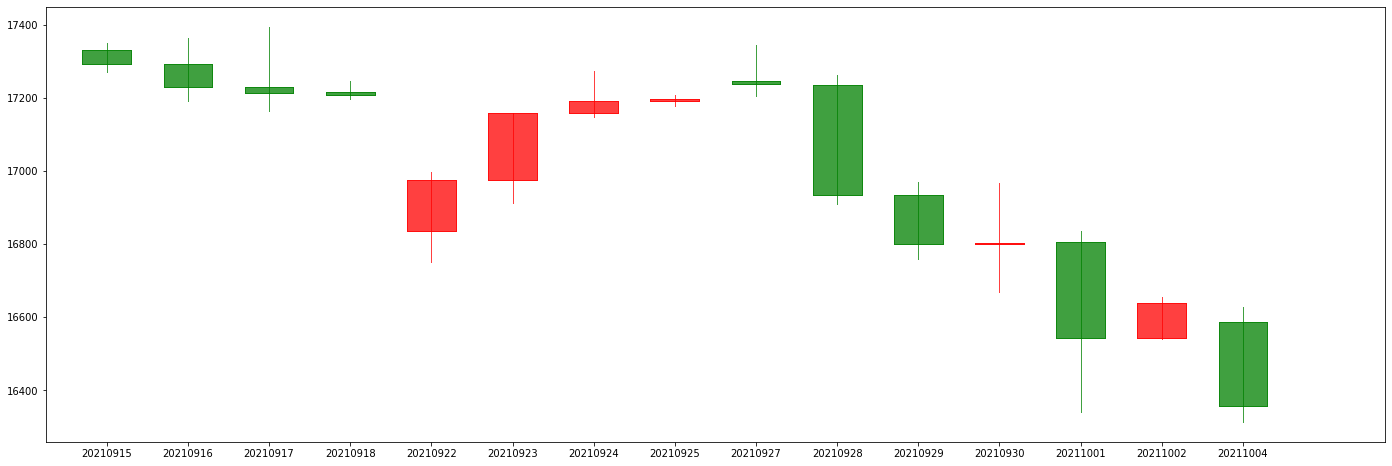

In [10]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_day.index), 1))
ax.set_xticklabels(df_day.index[::1])
candlestick2_ochl(ax, df_day['open'], df_day['close'], df_day['high'],
                      df_day['low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

## Plot tick bar

In [11]:
data

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S)
0,20210915,TX,202110,150000,17332,236
1,20210915,TX,202110,150000,17332,6
2,20210915,TX,202110,150000,17333,8
3,20210915,TX,202110,150000,17334,2
4,20210915,TX,202110,150000,17335,12
...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2
1146156,20211004,TX,202110,134459,16360,2
1146157,20211004,TX,202110,134459,16359,2
1146158,20211004,TX,202110,134459,16358,16


In [12]:
data['timestamp'] = data['成交日期'].astype(str) + '-' + data['成交時間'].astype(str)

In [13]:
num_ticks_per_bar = 10000

In [14]:
tick_groups = data.assign(groupID=lambda df: df.index // num_ticks_per_bar).groupby('groupID')
tick_groups.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [15]:
groupID = list(tick_groups.groups.keys())
open = []
high = []
low = []
close = []
volume = []
date = []

In [16]:
df_tick = pd.DataFrame(columns=['groupID', 'open', 'high', 'low', 'close', 'volume'])
for i in groupID:
    high.append(tick_groups.get_group(groupID[i])['成交價格'].max())
    low.append(tick_groups.get_group(groupID[i])['成交價格'].min())
    open.append(tick_groups.get_group(groupID[i])['成交價格'].iloc[0])
    close.append(tick_groups.get_group(groupID[i])['成交價格'].iloc[-1])
    volume.append(tick_groups.get_group(groupID[i])['成交數量(B+S)'].sum())
    date.append(tick_groups.get_group(groupID[i])['timestamp'].iloc[0])


In [17]:
df_tick['groupID'] = groupID
df_tick['open'] = open
df_tick['high'] = high
df_tick['low'] = low
df_tick['close'] = close
df_tick['volume'] = volume
df_tick['date'] = date

In [18]:
df_tick.set_index('date', inplace=True)

In [19]:
df_tick

,groupID,open,high,low,close,volume
date,,,,,,
20210915-150000,0,17332,17351,17293,17313,30408
20210915-221037,1,17313,17365,17270,17332,30746
20210916-84749,2,17332,17362,17320,17346,30222
20210916-93059,3,17346,17351,17255,17276,28020
20210916-94801,4,17275,17292,17226,17238,28010
...,...,...,...,...,...,...
20211004-102059,110,16473,16478,16402,16431,29900
20211004-105958,111,16431,16435,16343,16394,28926
20211004-114035,112,16394,16395,16313,16355,28754


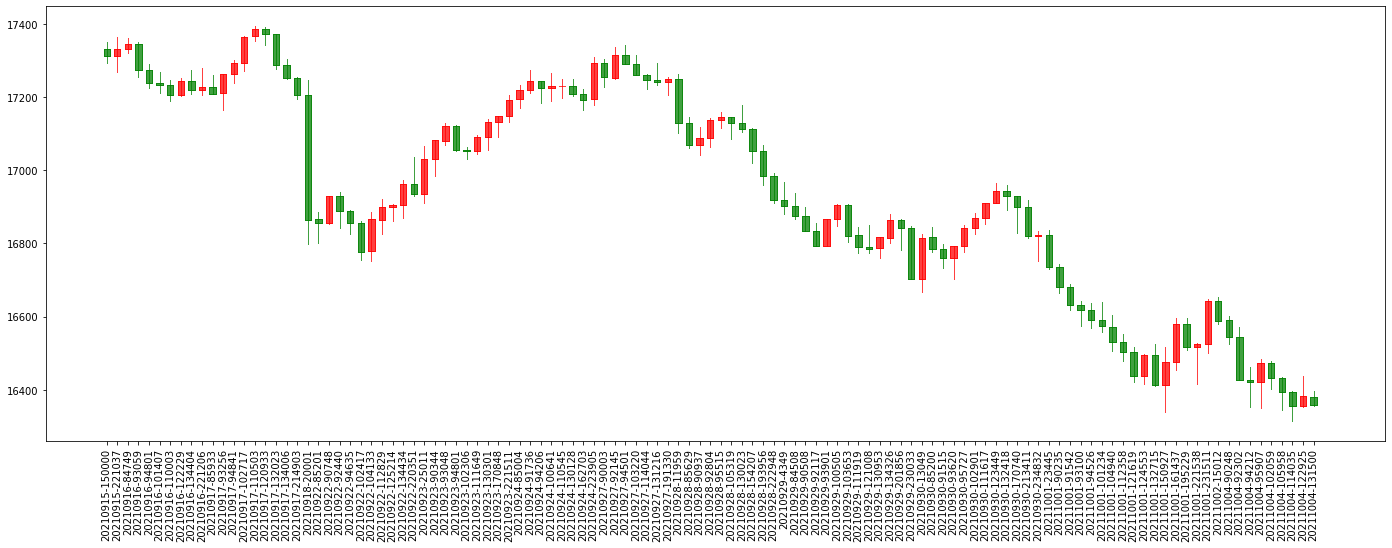

In [20]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_tick.index), 1))
ax.set_xticklabels(df_tick.index[::1], rotation=90)
candlestick2_ochl(ax, df_tick['open'], df_tick['close'], df_tick['high'],
                      df_tick['low'], width=0.6, colorup='r', colordown='g', alpha=0.75);

## Plot volume bar

In [21]:
data

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S),timestamp
0,20210915,TX,202110,150000,17332,236,20210915-150000
1,20210915,TX,202110,150000,17332,6,20210915-150000
2,20210915,TX,202110,150000,17333,8,20210915-150000
3,20210915,TX,202110,150000,17334,2,20210915-150000
4,20210915,TX,202110,150000,17335,12,20210915-150000
...,...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2,20211004-134458
1146156,20211004,TX,202110,134459,16360,2,20211004-134459
1146157,20211004,TX,202110,134459,16359,2,20211004-134459
1146158,20211004,TX,202110,134459,16358,16,20211004-134459


In [22]:
data['timestamp'] = data['成交日期'].astype(str) + '-' + data['成交時間'].astype(str)

In [23]:
data_cum_volume = data.assign(cum_volume=data['成交數量(B+S)'].cumsum())

In [24]:
data_cum_volume

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S),timestamp,cum_volume
0,20210915,TX,202110,150000,17332,236,20210915-150000,236
1,20210915,TX,202110,150000,17332,6,20210915-150000,242
2,20210915,TX,202110,150000,17333,8,20210915-150000,250
3,20210915,TX,202110,150000,17334,2,20210915-150000,252
4,20210915,TX,202110,150000,17335,12,20210915-150000,264
...,...,...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2,20211004-134458,3551598
1146156,20211004,TX,202110,134459,16360,2,20211004-134459,3551600
1146157,20211004,TX,202110,134459,16359,2,20211004-134459,3551602
1146158,20211004,TX,202110,134459,16358,16,20211004-134459,3551618


In [25]:
volume_per_bar = 100000

In [26]:
volume_groups = data_cum_volume.assign(groupID=lambda df: df.cum_volume // volume_per_bar).groupby('groupID')
volume_groups.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [27]:
groupID = list(volume_groups.groups.keys())
open = []
high = []
low = []
close = []
volume = []
date = []

In [28]:
df_volume = pd.DataFrame(columns=['groupID', 'open', 'high', 'low', 'close', 'volume'])
for i in groupID:
    high.append(volume_groups.get_group(groupID[i])['成交價格'].max())
    low.append(volume_groups.get_group(groupID[i])['成交價格'].min())
    open.append(volume_groups.get_group(groupID[i])['成交價格'].iloc[0])
    close.append(volume_groups.get_group(groupID[i])['成交價格'].iloc[-1])
    volume.append(volume_groups.get_group(groupID[i])['成交數量(B+S)'].sum())
    date.append(volume_groups.get_group(groupID[i])['timestamp'].iloc[0])


In [29]:
df_volume['groupID'] = groupID
df_volume['open'] = open
df_volume['high'] = high
df_volume['low'] = low
df_volume['close'] = close
df_volume['volume'] = volume
df_volume['date'] = date

In [30]:
df_volume.set_index('date', inplace=True)

In [31]:
df_volume

,groupID,open,high,low,close,volume
date,,,,,,
20210915-150000,0,17332,17365,17262,17265,99998
20210916-93357,1,17266,17314,17191,17198,100000
20210916-120002,2,17197,17280,17193,17228,100000
20210917-85738,3,17228,17302,17165,17286,100000
20210917-103637,4,17286,17395,17280,17329,99996
20210917-132900,5,17330,17331,16799,16844,100000
20210922-84604,6,16844,16940,16800,16851,100004
20210922-94525,7,16852,16894,16751,16855,99996
20210922-115716,8,16856,16998,16827,16988,100000


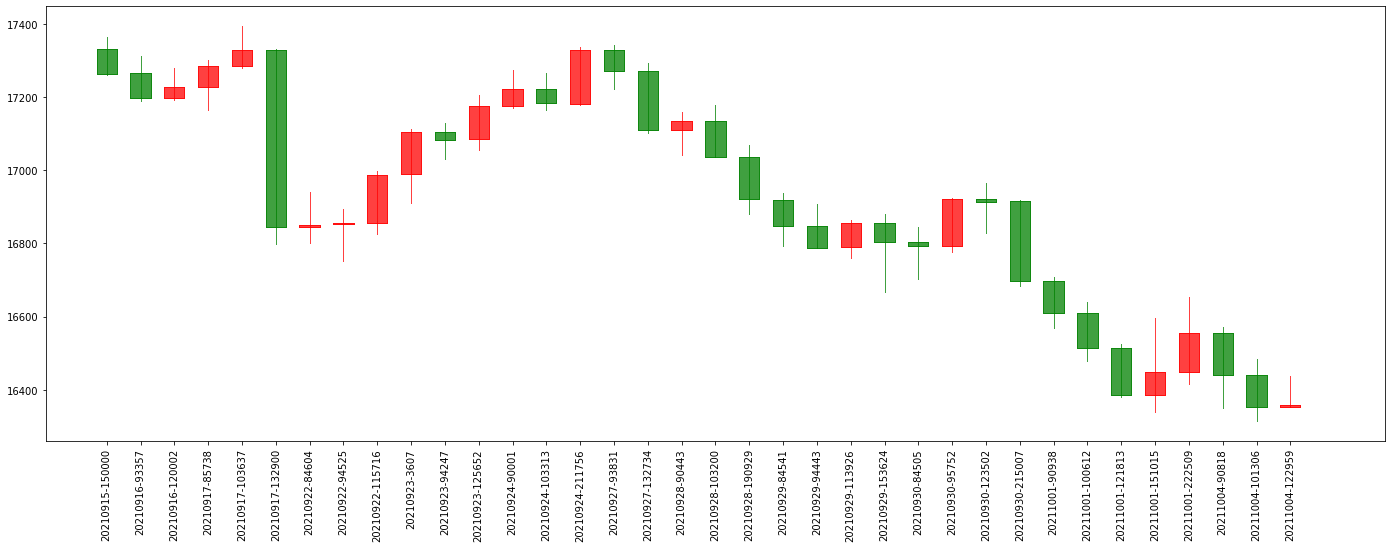

In [32]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_volume.index), 1))
ax.set_xticklabels(df_volume.index[::1], rotation=90)
candlestick2_ochl(ax, df_volume['open'], df_volume['close'], df_volume['high'],
                      df_volume['low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

## Plot dollar bar

In [33]:
data

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S),timestamp
0,20210915,TX,202110,150000,17332,236,20210915-150000
1,20210915,TX,202110,150000,17332,6,20210915-150000
2,20210915,TX,202110,150000,17333,8,20210915-150000
3,20210915,TX,202110,150000,17334,2,20210915-150000
4,20210915,TX,202110,150000,17335,12,20210915-150000
...,...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2,20211004-134458
1146156,20211004,TX,202110,134459,16360,2,20211004-134459
1146157,20211004,TX,202110,134459,16359,2,20211004-134459
1146158,20211004,TX,202110,134459,16358,16,20211004-134459


In [34]:
data['timestamp'] = data['成交日期'].astype(str) + '-' + data['成交時間'].astype(str)

In [35]:
data = data.assign(dollar=data['成交價格'] * data['成交數量(B+S)'])

In [36]:
data_cum_dollar = data.assign(cum_dollar=data['dollar'].cumsum())

In [37]:
data_cum_dollar

,成交日期,商品代號,到期月份(週別),成交時間,成交價格,成交數量(B+S),timestamp,dollar,cum_dollar
0,20210915,TX,202110,150000,17332,236,20210915-150000,4090352,4090352
1,20210915,TX,202110,150000,17332,6,20210915-150000,103992,4194344
2,20210915,TX,202110,150000,17333,8,20210915-150000,138664,4333008
3,20210915,TX,202110,150000,17334,2,20210915-150000,34668,4367676
4,20210915,TX,202110,150000,17335,12,20210915-150000,208020,4575696
...,...,...,...,...,...,...,...,...,...
1146155,20211004,TX,202110,134458,16359,2,20211004-134458,32718,60150114308
1146156,20211004,TX,202110,134459,16360,2,20211004-134459,32720,60150147028
1146157,20211004,TX,202110,134459,16359,2,20211004-134459,32718,60150179746
1146158,20211004,TX,202110,134459,16358,16,20211004-134459,261728,60150441474


In [38]:
dollar_per_bar = 1000000000
dollar_groups = data_cum_dollar.assign(groupID=lambda df: df.cum_dollar // dollar_per_bar).groupby('groupID')
dollar_groups.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [39]:
groupID = list(dollar_groups.groups.keys())
open = []
high = []
low = []
close = []
volume = []
date = []

In [40]:
df_dollar = pd.DataFrame(columns=['groupID', 'open', 'high', 'low', 'close', 'volume'])
for i in groupID:
    high.append(dollar_groups.get_group(groupID[i])['成交價格'].max())
    low.append(dollar_groups.get_group(groupID[i])['成交價格'].min())
    open.append(dollar_groups.get_group(groupID[i])['成交價格'].iloc[0])
    close.append(dollar_groups.get_group(groupID[i])['成交價格'].iloc[-1])
    volume.append(dollar_groups.get_group(groupID[i])['成交數量(B+S)'].sum())
    date.append(dollar_groups.get_group(groupID[i])['timestamp'].iloc[0])

In [41]:
df_dollar['groupID'] = groupID
df_dollar['open'] = open
df_dollar['high'] = high
df_dollar['low'] = low
df_dollar['close'] = close
df_dollar['volume'] = volume
df_dollar['date'] = date

In [42]:
df_dollar.set_index('date', inplace=True)

In [43]:
df_dollar

,groupID,open,high,low,close,volume
date,,,,,,
20210915-150000,0,17332,17365,17270,17334,57736
20210916-84505,1,17333,17362,17255,17302,57736
20210916-94405,2,17302,17310,17211,17260,57966
20210916-105241,3,17260,17262,17191,17241,58052
20210916-132954,4,17241,17280,17207,17279,58000
...,...,...,...,...,...,...
20211004-90752,56,16563,16572,16412,16413,60582
20211004-94825,57,16414,16485,16350,16467,60906
20211004-103042,58,16468,16475,16325,16329,60990


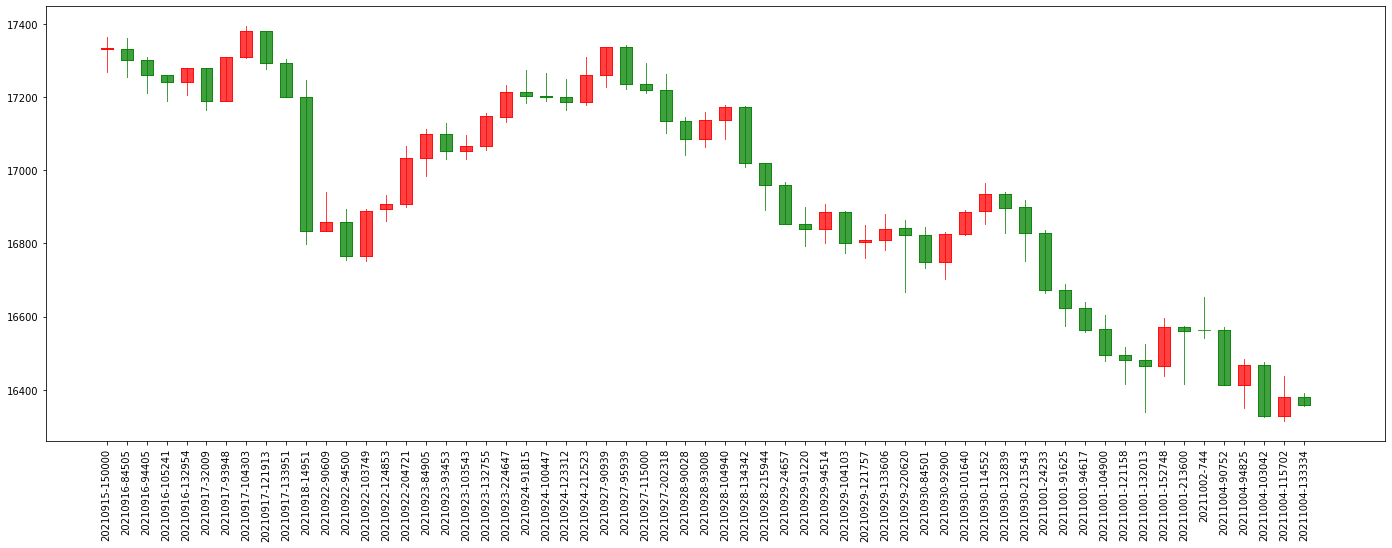

In [44]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_dollar.index), 1))
ax.set_xticklabels(df_dollar.index[::1], rotation=90)
candlestick2_ochl(ax, df_dollar['open'], df_dollar['close'], df_dollar['high'],
                      df_dollar['low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 